In [94]:
from scipy.stats import norm
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")

In [95]:
data = pd.read_csv("data.csv")

In [96]:
mu0 = 1.256637062E-6
R = 0.2
n = 154

data["B"] = ((4/5)**(3/2))*mu0*n*data["Current"]/R
data["e/m"] = 2*data["Voltage"]/(data["B"]*data["radius"])**2
data

,Voltage,Current,radius,B,e/m
0,100,2.43,0.02,0.001682,1.766389e+11
1,120,2.57,0.02,0.001779,1.895020e+11
2,140,2.79,0.02,0.001932,1.875938e+11
3,160,3.00,0.02,0.002077,1.854284e+11
4,180,3.17,0.02,0.002195,1.868327e+11
5,200,3.38,0.02,0.002340,1.825978e+11
6,220,3.52,0.02,0.002437,1.851980e+11
7,100,1.49,0.03,0.001032,2.088064e+11
8,120,1.67,0.03,0.001156,1.994641e+11
9,140,1.81,0.03,0.001253,1.981013e+11


In [97]:
print("Mean Value of e/m: {:e}".format(data["e/m"].mean()))
print(f"Standard deviation of e/m: {data["e/m"].std():.6f}")

Mean Value of e/m: 1.978126e+11
Standard deviation of e/m: 8342497796.374347


In [98]:
(1.98 - 1.759)/1.759

0.12563956793632752

In [104]:
def gaussian(x, mu, sigma):
    return np.exp((-(x-mu)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

mu = data["e/m"].mean()
sigma = data["e/m"].std()
print(sigma)

X = np.linspace(1e11, 2.5e11, 100000)

8342497796.374347


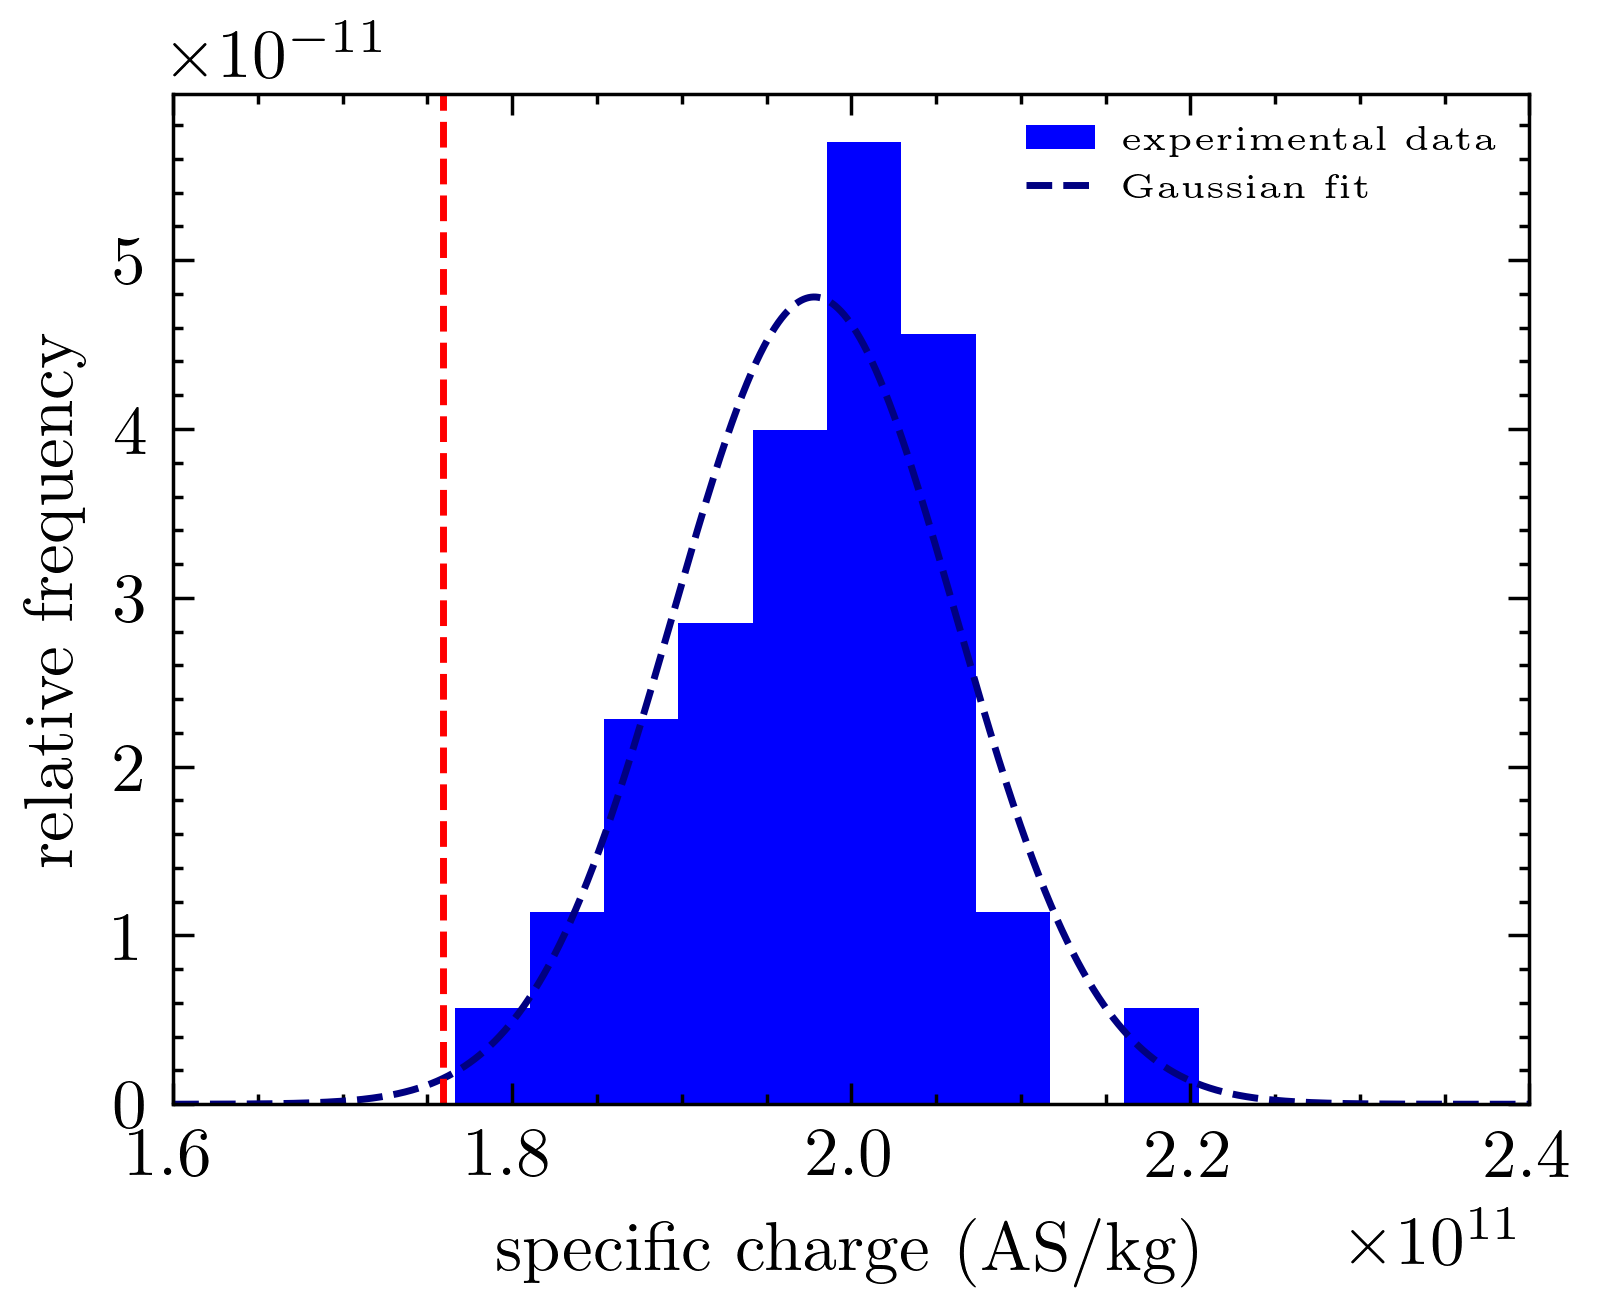

In [115]:
plt.figure(dpi=500)
plt.hist(data["e/m"], color="blue", density=True, label='experimental data')
plt.xlabel(r"specific charge (AS/kg)")
plt.plot(X, gaussian(X, mu, sigma), color="navy", ls="--", label="Gaussian fit")
plt.ylabel("relative frequency")
plt.axvline(x=1.759e11, ls="--", color="red")
#plt.text(x=1.77e11, s="literature value", y=2, rotation=90, color="red")
plt.xlim(1.6e11, 2.4e11)
plt.legend(loc="upper right", fontsize="5")
plt.show()